In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [4]:
url = "https://archive.ics.uci.edu/static/public/109/data.csv"
df = pd.read_csv(url)

In [5]:
X = df.drop(columns=['class'])  # Features are all columns except 'class'
y = df['class']

In [6]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (178, 13)
Shape of y: (178,)


In [7]:
print("\nFirst few rows of X:")
print(X.head())


First few rows of X:
   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0  

In [8]:
print("\nFirst few rows of y:")
print(y.head())


First few rows of y:
0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (142, 13)
Shape of X_test: (36, 13)
Shape of y_train: (142,)
Shape of y_test: (36,)


In [10]:
print("\nFirst few rows of X_train:")
print(X_train.head())

print("\nFirst few rows of X_test:")
print(X_test.head())

print("\nFirst few rows of y_train:")
print(y_train.head())

print("\nFirst few rows of y_test:")
print(y_test.head())


First few rows of X_train:
     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
158    14.34       1.68  2.70               25.0         98           2.80   
137    12.53       5.51  2.64               25.0         96           1.79   
98     12.37       1.07  2.10               18.5         88           3.52   
159    13.48       1.67  2.64               22.5         89           2.60   
38     13.07       1.50  2.10               15.5         98           2.40   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
158        1.31                  0.53             2.70            13.00  0.57   
137        0.60                  0.63             1.10             5.00  0.82   
98         3.75                  0.24             1.95             4.50  1.04   
159        1.10                  0.52             2.29            11.75  0.57   
38         2.64                  0.28             1.37             3.70  1.18   

     0D280_0D315

In [11]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [12]:
print(X_train.dtypes)
print(X_test.dtypes)

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object
Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_win

In [13]:
def confusion_matrix(y_true, y_pred):
    # Determine the size of the matrix
    num_classes = np.max(np.unique(y_true)) + 1

    # Initialize the confusion matrix with zeros
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    # Populate the confusion matrix
    for actual, predicted in zip(y_true, y_pred):
        conf_matrix[actual][predicted] += 1

    return conf_matrix


In [14]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Convert labels to numerical values
        label_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
        k_nearest_labels_numeric = [label_mapping[label] for label in k_nearest_labels]

        most_common = np.bincount(k_nearest_labels_numeric).argmax()
        y_pred.append(list(label_mapping.keys())[list(label_mapping.values()).index(most_common)])

    return np.array(y_pred)

# Test the model
k_values = [1, 3, 5, 7, 9]  # Different values of K to test

for k in k_values:
    # Predictions for the test set
    y_pred = predict(X_train.values, y_train.values, X_test.values, k)

    # Calculate accuracy
    acc = accuracy(y_test.values, y_pred)
    print(f"\nAccuracy for k={k}: {acc:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test.values, y_pred)
    print(f"Confusion Matrix for k={k}:\n{conf_matrix}")


Accuracy for k=1: 0.7778
Confusion Matrix for k=1:
[[ 0  0  0  0]
 [ 0 12  0  2]
 [ 0  3 11  0]
 [ 0  1  2  5]]

Accuracy for k=3: 0.8056
Confusion Matrix for k=3:
[[ 0  0  0  0]
 [ 0 12  0  2]
 [ 0  1 11  2]
 [ 0  1  1  6]]

Accuracy for k=5: 0.7222
Confusion Matrix for k=5:
[[ 0  0  0  0]
 [ 0 12  0  2]
 [ 0  0 11  3]
 [ 0  2  3  3]]

Accuracy for k=7: 0.6944
Confusion Matrix for k=7:
[[ 0  0  0  0]
 [ 0 13  0  1]
 [ 0  0  9  5]
 [ 0  2  3  3]]

Accuracy for k=9: 0.7222
Confusion Matrix for k=9:
[[ 0  0  0  0]
 [ 0 12  0  2]
 [ 0  0  9  5]
 [ 0  2  1  5]]


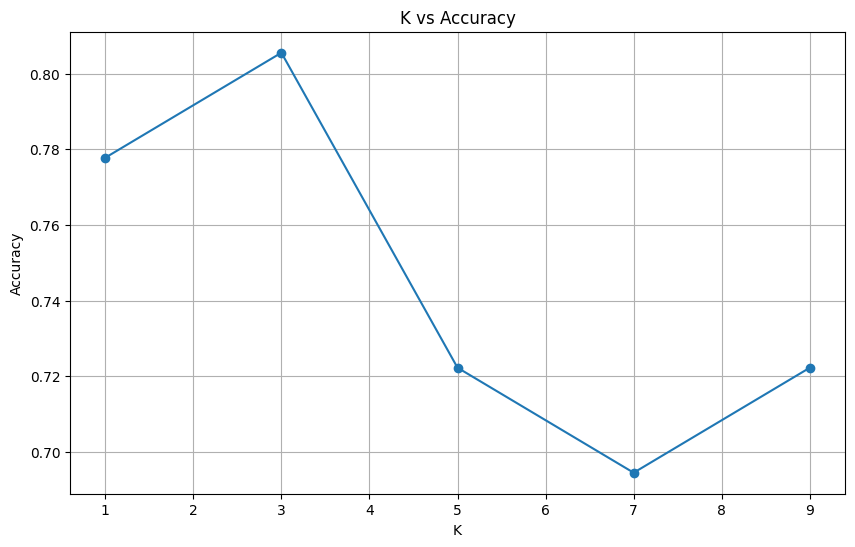


Maximum Accuracy: 0.8056 at k = 3


In [15]:
import matplotlib.pyplot as plt

accuracy_values = []

for k in k_values:
    y_pred = predict(X_train.values, y_train.values, X_test.values, k)
    acc = accuracy(y_test.values, y_pred)
    accuracy_values.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid(True)
plt.show()

max_acc_index = np.argmax(accuracy_values)
max_acc_k = k_values[max_acc_index]
print(f"\nMaximum Accuracy: {accuracy_values[max_acc_index]:.4f} at k = {max_acc_k}")